In [ ]:
<div style="text-align:center">
    <h1>
        Value Iteration
    </h1>
</div>
<br>

<div style="text-align:center">
    <p>
        In this notebook we are going to look at a dynamic programming algorithm called value iteration. In it, we will sweep the state space and update all the V(s) values.
    </p>
</div>

<br><br>
<div style="text-align:center">
    <b>This notebook belongs to section 3 of the course "Reinforcement Learning: beginner to master".</b>
    <br><br>
    <a href="https://www.udemy.com">Reinforcement Learning: beginner to master</a> (English)
    <br>
    <a href="https://www.udemy.com">Reinforcement Learning: de principiante a maestro</a> (Spanish)
</div>

<br>

<table style="width:35%">
  <tr style="background-color: transparent">
    <td style="width: 45%">
        <a target="_parent" href="https://www.evlabs.io" style="float: center">
            <img src="img/evlabs-square.png" width="75"/>
        </a> 
    </td>
    <td valign="bottom">
        <a target="_parent" href="https://www.youtube.com/channel/UCksRNSzWuMV5IfdrPlglqqw">
            <img src="img/YouTube.png" width="35"/>
        </a> 
    </td>
    <td>
        <a target="_parent" href="https://www.linkedin.com/company/evlabs">
            <img src="img/LinkedIn.png" width="35"/>
        </a> 
    </td>
    <td>
        <a target="_parent" href="https://twitter.com/evelabs">
            <img src="img/Twitter.png" width="35"/>
        </a> 
    </td>
    <td>
        <a target="_parent" href="https://github.com/escape-velocity-labs/">
            <img src="img/GitHub.png" width="35"/>
        </a> 
    </td>

  </tr>
  <tr style="background-color: transparent">
    <th style="text-align: center; width: 70%">Escape Velocity Labs</th>
  </tr>

</table>

<br>

## Import the necessary software libraries:

In [24]:
import numpy as np
import matplotlib.pyplot as plt

from envs import Maze
from utils import plot_policy, plot_values, test_agent

## Initialize the environment

In [25]:
env = Maze()

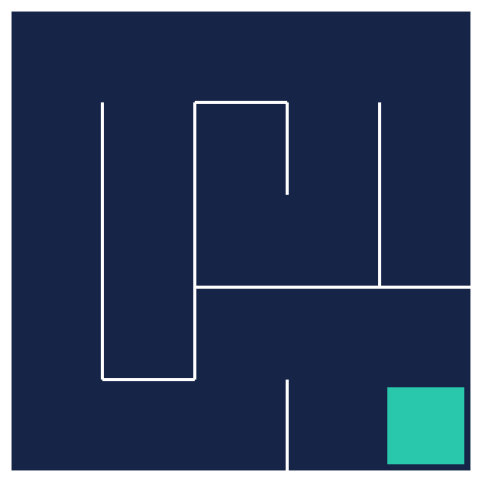

In [26]:
frame = env.render(mode='rgb_array')
plt.figure(figsize=(6,6))
plt.axis('off')
plt.imshow(frame)

In [27]:
print(f"Observation space shape: {env.observation_space.nvec}")
print(f"Action space shape: {env.action_space.n}")

Observation space shape: [5 5]
Action space shape: 4


## Define the policy $\pi(\cdot|s)$

#### Create the policy $\pi(\cdot|s)$

In [28]:
policy_probs = np.full((5, 5, 4), 0.25)

In [29]:
def policy(state):
    return policy_probs[state]

#### Test the policy with state (0, 0)

In [30]:
action_probabilities = policy((0,0))
for action, prob in zip(range(4), action_probabilities):
    print(f"Probability of taking action {action}: {prob}")

Probability of taking action 0: 0.25
Probability of taking action 1: 0.25
Probability of taking action 2: 0.25
Probability of taking action 3: 0.25


#### See how the random policy does in the maze

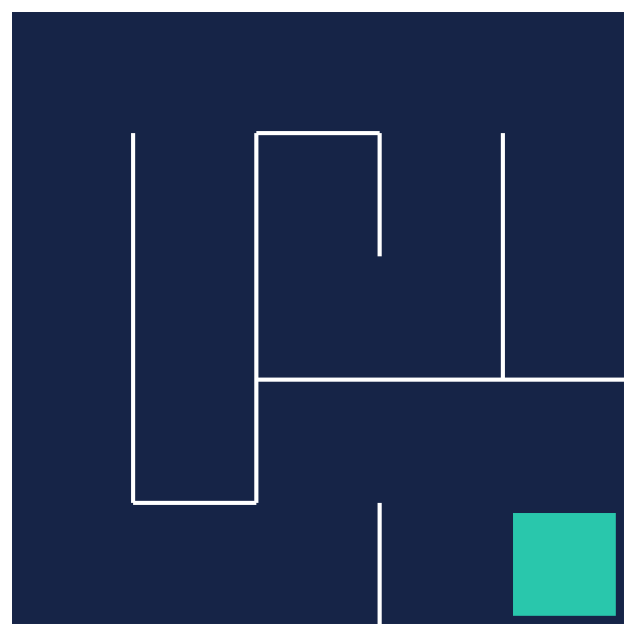

In [9]:
test_agent(env, policy, episodes=1)

#### Plot the policy

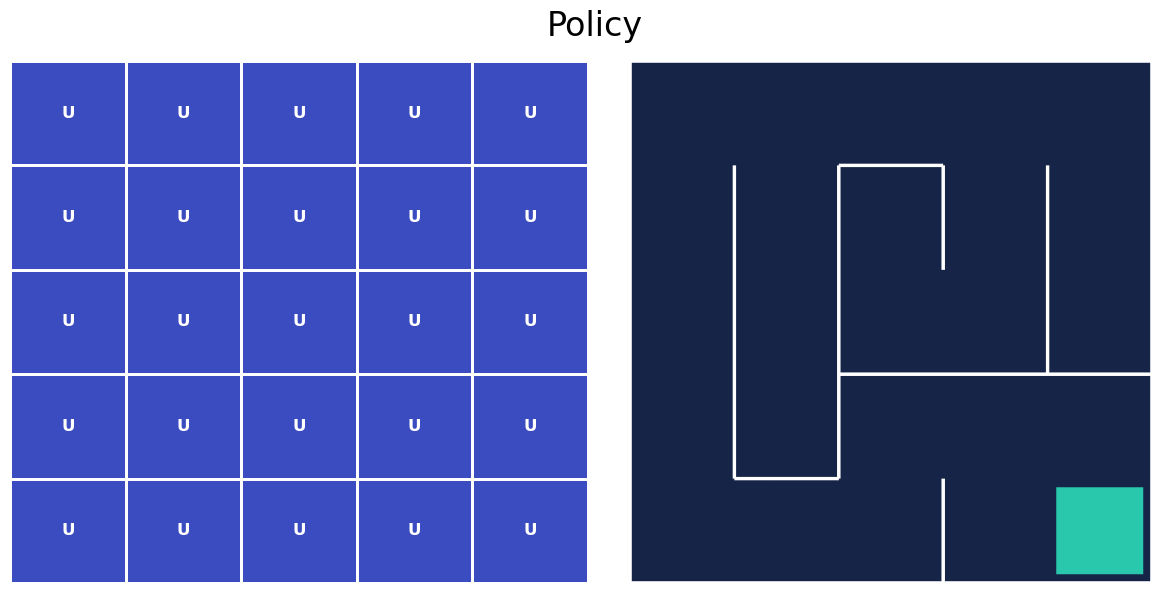

In [31]:
plot_policy(policy_probs, frame)

## Define value table $V(s)$

#### Create the $V(s)$ table

In [32]:
# set all state values to zero. But could have set them to anything, so long as the V(termination) = 0 ????
state_values = np.zeros(shape=(5, 5))
# state_values = np.ones(shape=(5, 5)) * -1
#state_values[(4, 4)] = 0

#### Plot $V(s)$

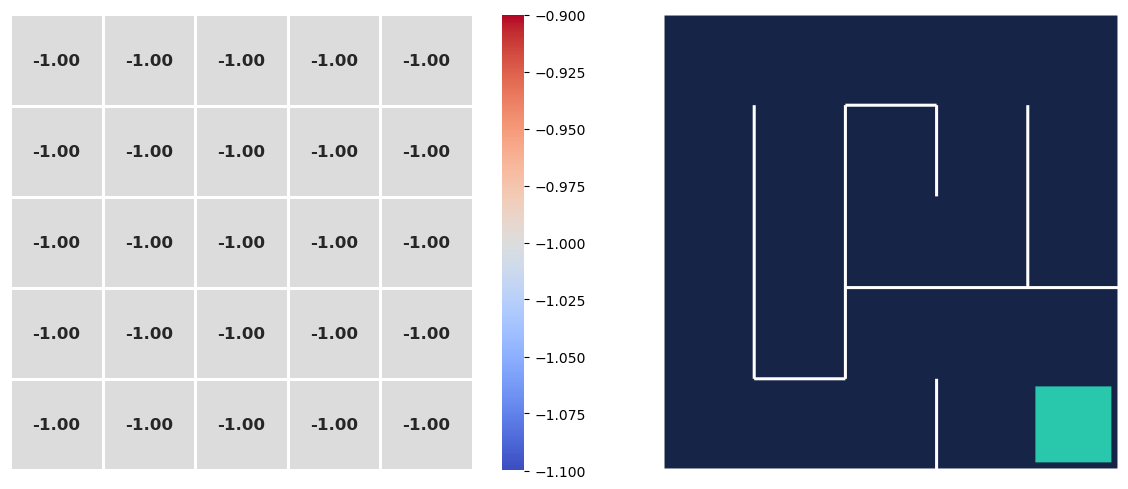

In [33]:
plot_values(state_values, frame)

## Implement the Value Iteration algorithm

</br>


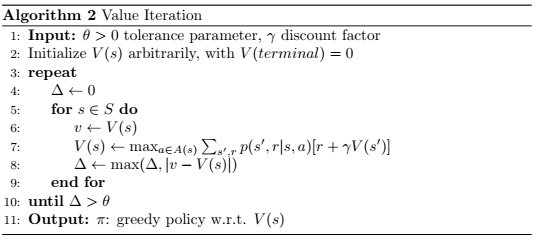

<div style="text-align:center">
    Adapted from Barto & Sutton: "Reinforcement Learning: An Introduction".
</div>

In [34]:
def value_iteration(policy_probs, state_values, theta=1e-6, gamma=0.99):
    delta = float('inf')

    while delta > theta:
        delta = 0
        # for s E S
        for row in range(5):
            for col in range(5):
                # v = V(s)
                old_value = state_values[(row, col)]
                action_probs = None
                max_qsa = float('-inf')

                # V(s) = max probs
                for action in range(4):
                    next_state, reward, _, _ = env.simulate_step((row, col), action)
                    qsa = reward + gamma * state_values[next_state]
                    if qsa > max_qsa:
                        max_qsa = qsa
                        action_probs = np.zeros(4)
                        action_probs[action] = 1

                state_values[(row, col)] = max_qsa
                policy_probs[(row, col)] = action_probs

                # delta is now the max of delta or v - V(s)
                delta = max(delta, abs(max_qsa - old_value))

In [35]:
value_iteration(policy_probs, state_values)

## Show results

#### Show resulting value table $V(s)$

Exception ignored in: <function Viewer.__del__ at 0x000001EE45A385E0>
Traceback (most recent call last):
  File "C:\Users\steve\mambaforge\envs\rl-beginner-master\lib\site-packages\gym\envs\classic_control\rendering.py", line 185, in __del__
    self.close()
  File "C:\Users\steve\mambaforge\envs\rl-beginner-master\lib\site-packages\gym\envs\classic_control\rendering.py", line 101, in close
    self.window.close()
  File "C:\Users\steve\mambaforge\envs\rl-beginner-master\lib\site-packages\pyglet\window\win32\__init__.py", line 332, in close
    super(Win32Window, self).close()
  File "C:\Users\steve\mambaforge\envs\rl-beginner-master\lib\site-packages\pyglet\window\__init__.py", line 858, in close
    app.windows.remove(self)
  File "C:\Users\steve\mambaforge\envs\rl-beginner-master\lib\_weakrefset.py", line 109, in remove
    self.data.remove(ref(item))
KeyError: <weakref at 0x000001EE459D9590; to 'Win32Window' at 0x000001EE455D53D0>


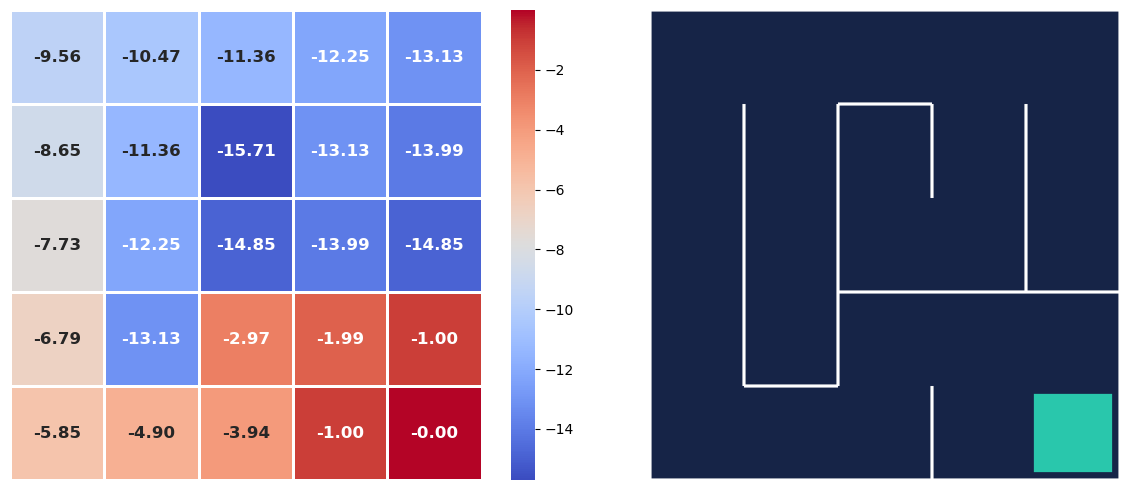

In [36]:
plot_values(state_values, frame)

#### Show resulting policy $\pi(\cdot|s)$

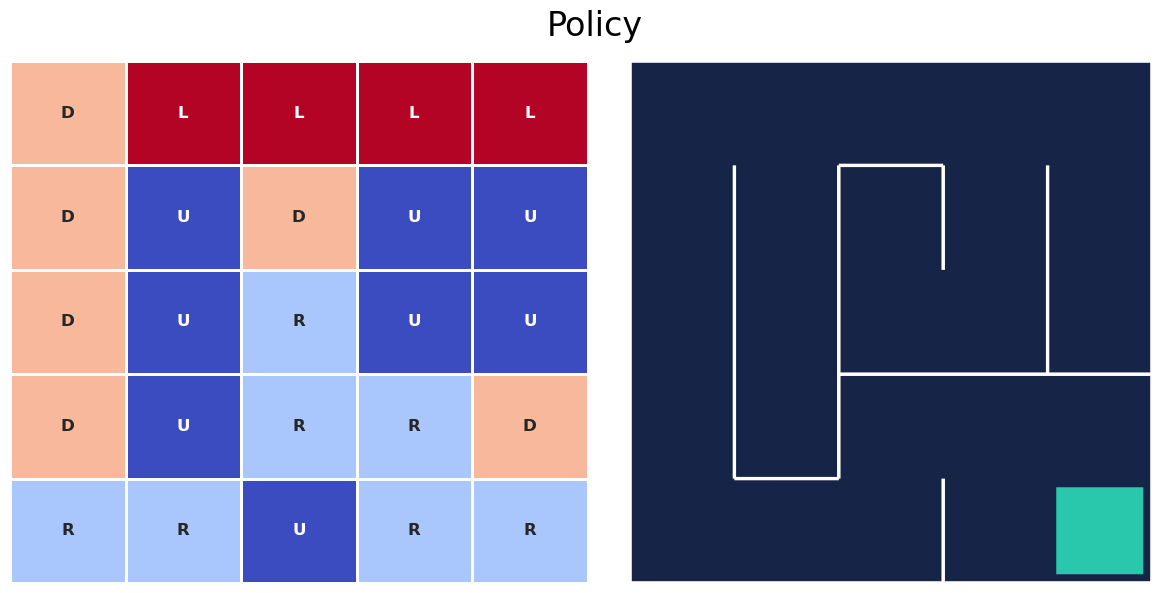

In [37]:
plot_policy(policy_probs, frame)

#### Test the resulting agent

KeyboardInterrupt: 

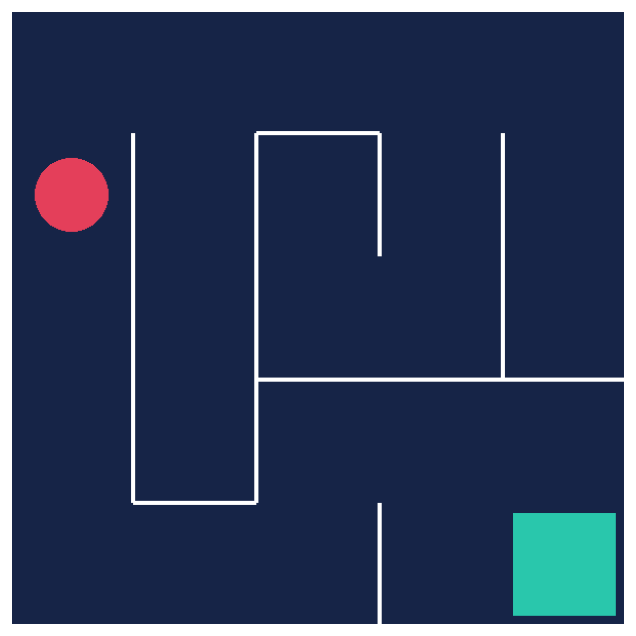

In [17]:
test_agent(env, policy)

## Resources

[[1] Reinforcement Learning: An Introduction. Ch. 4: Dynamic Programming](https://web.stanford.edu/class/psych209/Readings/SuttonBartoIPRLBook2ndEd.pdf)